# ETL/EDA de datasets a nivel provincial

In [91]:
#Importar paquetes
import pandas as pd
import matplotlib.pyplot as plt
#Configura la opción de visualización para valores decimales en lugar de notación científica
pd.set_option('display.float_format', '{:.2f}'.format)

## Datos de conexion a internet a nivel provincial

In [92]:
#Leer los datos de los CSVs provinciales sobre conexion a internet
prov_num_access = pd.read_csv('datasets/internet/provincia_acceso_cada_100_hogares.csv', encoding='utf-8')
prov_conn_type = pd.read_csv('datasets/internet/provincia_tecnologia_de_conexion.csv', encoding='utf-8')
prov_vel_range = pd.read_csv('datasets/internet/provincia_rango_de_velocidad.csv', encoding='utf-8')
prov_vel_mean = pd.read_csv('datasets/internet/provincia_velocidad_media.csv', encoding='utf-8')

### Cantidad de accesos por provinvia por periodo de tiempo

`Dataframe: prov_num_access`

Este dataframe contiene información sobre el acceso que tienen los ciudadanos de la Republica Argentina, estimado cada 100 hogares por provincia.

Descripcion:
- Año: periodo de tiempo donde se evaluan los accesos. 
- Trimestre: subdivisiones del periodo año.
- Provincia: provincia a la que pertenecen los datos.
- Accesos por hogares: cantidad de accesos cada 100 hogares en el periodo de tiempo especificado.

In [93]:
#Tamaño del dataframe
prov_num_access.shape

(792, 4)

In [94]:
#Resumen de primeros datos
prov_num_access.head(3)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,1,Buenos Aires,"76,08"
1,2022,1,Capital Federal,"111,8"
2,2022,1,Catamarca,"58,21"


In [95]:
#Reemplazar ',' con '.'
prov_num_access['Accesos por cada 100 hogares'] = prov_num_access['Accesos por cada 100 hogares'].str.replace(',','.')

In [96]:
#Valores nulos y el tipo de datos de las series
print(prov_num_access.isnull().sum())
print(prov_num_access.dtypes)

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64
Año                              int64
Trimestre                        int64
Provincia                       object
Accesos por cada 100 hogares    object
dtype: object


In [97]:
#Transformar str a float
prov_num_access['Accesos por cada 100 hogares'] = prov_num_access['Accesos por cada 100 hogares'].astype(float)

In [98]:
#Eliminar columnas innecesarias
prov_num_access = prov_num_access.drop(['Trimestre'], axis=1)

In [99]:
#Agrupar datos por año promediando trimestres
prov_num_access = prov_num_access.groupby(['Año', 'Provincia']).mean().reset_index()

In [100]:
prov_num_access.describe()

,Año,Accesos por cada 100 hogares
count,216.00,216.00
mean,2018.00,49.41
std,2.59,22.92
min,2014.00,9.62
25%,2016.00,32.26
50%,2018.00,45.87
75%,2020.00,61.49
max,2022.00,119.30


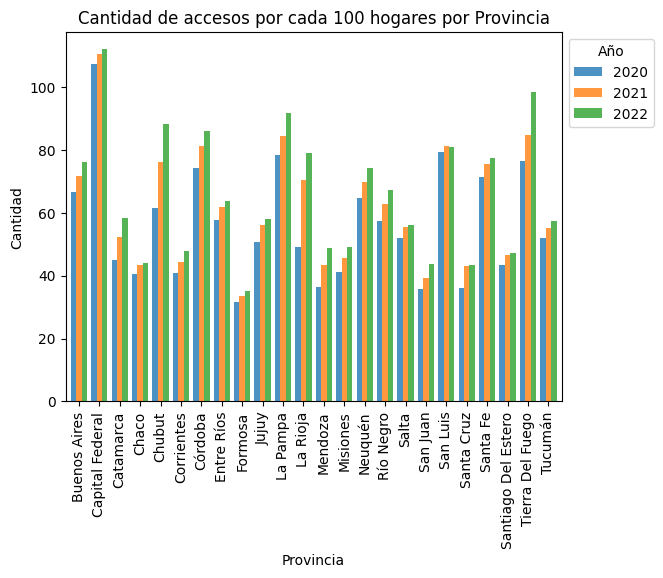

In [101]:
#Filtro de datos para obtener solo los años 2019, 2020 y 2021
df_filtrado = prov_num_access[prov_num_access['Año'].isin([2020, 2021, 2022])]

# Crea un pivot table para tener los años como columnas
pivot_table = df_filtrado.pivot_table(index='Provincia', columns='Año', values='Accesos por cada 100 hogares', aggfunc='sum')
# Crea el gráfico de barras con las barras superpuestas
pivot_table.plot(kind='bar', width=0.8, alpha=0.8)
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.title('Cantidad de accesos por cada 100 hogares por Provincia')
plt.legend(title='Año', bbox_to_anchor=(1, 1))
plt.show()

#### Conclusion de graficos por cada 100 hogares por provincia los ultimos tres años

`Graficos de barras similares sumamamente variado`

En el ambito nacional ya sentamos las posibles bases de las ocurrencias en nuestro grafico donde Provincias como Chubut, Cordoba, La Pampa, Tierra del Fuego y Capital Federal tienen la mayor cantidad de accesos por cada 100 hogares.<br>
Asi tambien Formosa, Chaco, Corrientes, San Juan, Mendoza, Misiones, Santiago del Estero y Tucuman tienen la menor cantidad de acceso por cada 100 hogares.<br>

Este grafico esta intimamente ligado al punto de Infraestructura:

- Infraestructura: se puede ver reflejado la disponibilidad de acceso a Internet. Es posible que las áreas con una buena infraestructura de acceso a Internet tengan tasas medianamente altas de servicio, asi tambien las zonas mas pobres o aisladas sufren lo contrario.

Esto se debe directamente no a la velocidad de ancho de banda que puedan tener las provincias sino que esta ligado a las ubicaciones geograficas optimas o adversas y a la centralizacion de la poblacion de las provincias. 

---

### Cantidad de usuarios por tecnologia de conexion por provinvia por periodos de tiempo

`Dataframe: prov_conn_type`

Este dataframe contiene información sobre el tipo de conexion que tienen los ciudadanos de la Republica Argentina, estimado en cantidades por provincia.

Descripcion:
- Año: periodo de tiempo donde se evaluan los accesos. 
- Trimestre: subdivisiones del periodo año.
- Provincia: provincia a la que pertenecen los datos.
- ADSL: es una tecnología de acceso a Internet que utiliza las líneas telefónicas existentes para proporcionar una conexión de banda ancha asmetrica.
- Cablemodem: es una tecnología de acceso a Internet que utiliza las redes de televisión por cable existentes para ofrecer conexión de banda ancha.
- Fibra óptica: es una tecnología de acceso a Internet que utiliza cables de fibra óptica para transmitir datos en forma de pulsos de luz.
- Wireless: es una tecnologia de conexion inalámbrica a Internet, también conocidas como redes Wi-Fi. 
- Otros: otro tipo de tecnologias de conexion a internet.
- Total: sumatoria de la cantidad de todos los tipos de conexiones por periodo de tiempo.

In [102]:
#Tamaño del dataframe
prov_conn_type.shape

(793, 9)

In [103]:
#Resumen de primeros datos
prov_conn_type.head(3)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,1,Buenos Aires,392.045,2.728.865,1.242.121,125.521,66.87,4.555.424
1,2022,1,Capital Federal,102.290,1.217.225,62.308,5.784,29.93,1.417.541
2,2022,1,Catamarca,14.181,15.517,29.118,1.328,2.23,62.378


In [104]:
#Reemplazar '.' con '' y '- 0' a 0
prov_conn_type[['ADSL','Cablemodem','Fibra óptica','Wireless','Total']] = prov_conn_type[['ADSL','Cablemodem','Fibra óptica','Wireless','Total']].applymap(lambda x: str(x).replace('.', ''))
prov_conn_type[['ADSL','Cablemodem','Fibra óptica','Wireless','Total']] = prov_conn_type[['ADSL','Cablemodem','Fibra óptica','Wireless','Total']].applymap(lambda x: str(x).replace('- 0', '0'))
prov_conn_type[['Año','Trimestre']] = prov_conn_type[['Año','Trimestre']].applymap(lambda x: str(x).replace(' *', ''))

In [105]:
#Valores nulos y tipo de datos de las series
print(prov_conn_type.isnull().sum())
print(prov_conn_type.dtypes)

Año             0
Trimestre       0
Provincia       1
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           1
Total           0
dtype: int64
Año              object
Trimestre        object
Provincia        object
ADSL             object
Cablemodem       object
Fibra óptica     object
Wireless         object
Otros           float64
Total            object
dtype: object


In [106]:
#Imprimir fila con nulo para saber como proceder
print(prov_conn_type[prov_conn_type.isnull().any(axis=1)])

    Año                                          Trimestre Provincia ADSL  \
792   *  Los datos provinciales no coinciden a nivel na...       NaN  nan   

    Cablemodem Fibra óptica Wireless  Otros Total  
792        nan          nan      nan    NaN   nan  


In [107]:
#Eliminar fila con valores nulos
prov_conn_type = prov_conn_type.dropna(subset=['Provincia'])

In [108]:
#Transformar str a float
prov_conn_type[['Año','ADSL','Cablemodem','Fibra óptica','Wireless','Total']] = prov_conn_type[['Año','ADSL','Cablemodem','Fibra óptica','Wireless','Total']].astype(float)

In [109]:
#Eliminar columnas innecesarias
prov_conn_type = prov_conn_type.drop(['Trimestre'], axis=1)

In [110]:
#Agrupar datos por año y provincia promediando demas columnas
prov_conn_type = prov_conn_type.groupby(['Año', 'Provincia']).mean().reset_index()

In [111]:
prov_conn_type.describe()

,Año,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,216.00,216.00,216.00,216.00,216.00,216.00,216.00
mean,2018.00,126032.68,174189.97,30312.20,10664.22,102.89,347506.05
std,2.59,251756.30,427690.42,123303.60,18493.86,187.54,746317.50
min,2014.00,7987.00,0.00,0.25,0.00,1.09,12951.25
25%,2016.00,22018.06,9412.25,259.69,417.44,5.03,53205.75
50%,2018.00,48641.38,35820.62,1241.12,4663.25,19.41,105305.88
75%,2020.00,102735.94,70782.94,14286.25,12508.00,62.50,178560.25
max,2022.00,1584178.75,2728865.00,1242121.00,125521.00,906.50,4555424.00


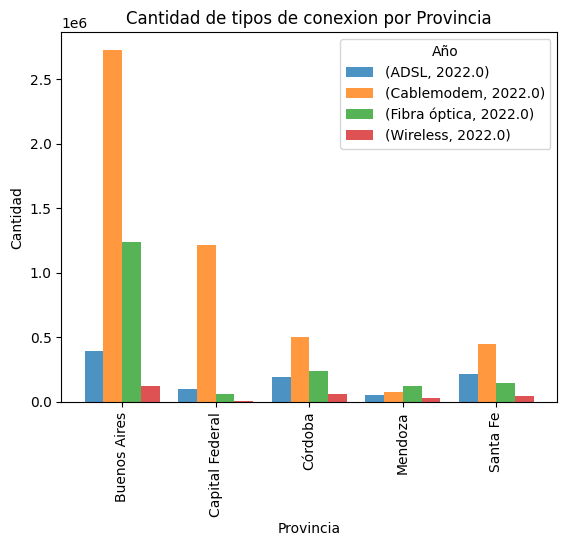

In [112]:
#Filtro de datos para obtener solo el 2022
df_filtrado = prov_conn_type[prov_conn_type['Provincia'].isin(['Buenos Aires','Capital Federal','Córdoba','Santa Fe','Mendoza']) & prov_conn_type['Año'].isin([2022])]

# Crea un pivot table para tener los años como columnas
pivot_table = df_filtrado.pivot_table(index='Provincia', columns='Año', values=['ADSL','Cablemodem','Fibra óptica','Wireless'], aggfunc='sum')
# Crea el gráfico de barras con las barras superpuestas
pivot_table.plot(kind='bar', width=0.8, alpha=0.8)
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.title('Cantidad de tipos de conexion por Provincia')
plt.legend(title='Año', bbox_to_anchor=(1, 1))
plt.show()

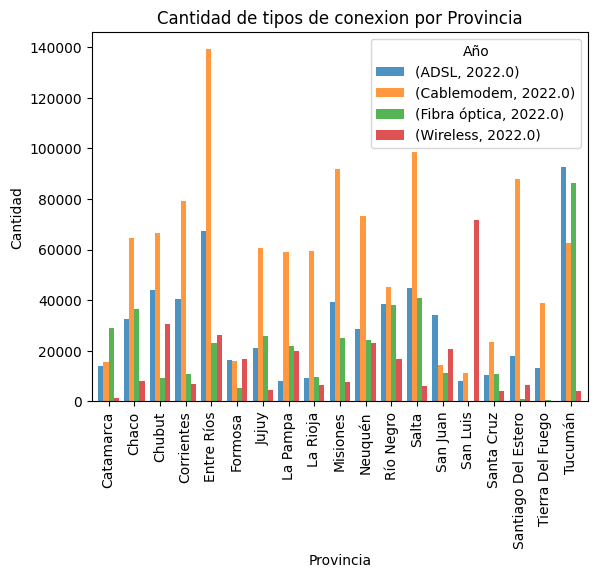

In [113]:
#Filtro de datos para obtener solo el 2022
df_filtrado = prov_conn_type[~prov_conn_type['Provincia'].isin(['Buenos Aires','Capital Federal','Córdoba','Santa Fe','Mendoza']) & prov_conn_type['Año'].isin([2022])]

# Crea un pivot table para tener los años como columnas
pivot_table = df_filtrado.pivot_table(index='Provincia', columns='Año', values=['ADSL','Cablemodem','Fibra óptica','Wireless'], aggfunc='sum')
# Crea el gráfico de barras con las barras superpuestas
pivot_table.plot(kind='bar', width=0.8, alpha=0.8)
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.title('Cantidad de tipos de conexion por Provincia')
plt.legend(title='Año', bbox_to_anchor=(1, 1))
plt.show()

#### Conclusion de grafico por tipo de conexion por provincia durante el 2022

`Graficos de barras que sugiere valores muy distantes de ciertas provincias`

Podemos observar un gran predominio en cantidad de Provincias centrales dentro de la Republica Argentina, esto habla no solamente de una red de conectividad sumamente cercana sino de la calidad y la velocidad de esta red. Esto habla del punto de infraestructura expresado en la seccion a nivel nacional:

- Infraestructura: el crecimiento del cablemodem y la fibra optica sugieren que se están realizando inversiones en infraestructura de banda ancha para ofrecer un mejor servicio de internet. Estas mejoras tambien podrian estar impulsando el cambio en la preferencia tecnologica de los usuarios.

Pero tambien podemos observar particularmente el gran dominio que esta teniendo actualmente la conexion 'Cablemodem', ademas de la adhesion a la fibra optica de las Provincias centrales y el uso de tipo de conexion ADSL en Provincias con menos cantidad de servicio de internet contratado. Esto habla de las preferencias tecnologicas de las grandes urbes del pais:

- Preferencia tecnologica: el descenso de la tecnologia ADSL y el crecimiento del cablemodem se puede deber al tipo de promociones que ofrecen los sistemas de internet y television por cable incluidos (factor un tanto economico). Asi tambien podria deberse al impacto social de los telefonos moviles sobre las lineas ADSL que tambien ofrecen servicio de telefonia fija.

---

### Cantidad de usuarios por velocidad de conexion por provincia por periodos de tiempo 

`Dataframe: prov_vel_range`

Este dataframe contiene información sobre la velocidad de conexion que tienen los ciudadanos de la Republica Argentina, estimado en cantidades por provincia.

Descripcion:
- Año: periodo de tiempo donde se evaluan los accesos. 
- Trimestre: subdivisiones del periodo año.
- Provincia: provincia a la que pertenecen los datos.
- 0Mbps hasta mas de 30Mbps: velocidad maxima de conexion a internet 
- Otros: otro velocidades de conexion a internet.
- Total: sumatoria de la cantidad de todas las velocidades por periodo de tiempo.

In [114]:
#Tamaño de dataframe
prov_vel_range.shape

(792, 12)

In [115]:
#Resumen de primeros datos
prov_vel_range.head(3)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,1,Buenos Aires,31.59,30.06,313.382,321.76,290.13,161.18,3.381.049,26.28,4.555.424
1,2022,1,Capital Federal,527.00,5.58,39.918,77.39,61.05,43.29,1.188.072,1.72,1.417.541
2,2022,1,Catamarca,71.00,456.00,4.386,7.01,8.77,3.76,35.715,2.21,62.378


In [116]:
#Renombrar columnas
prov_vel_range = prov_vel_range.rename(columns={'HASTA 512 kbps':'0 - 0.512Mbps',
                        '+ 512 Kbps - 1 Mbps':'0.512Mbps - 1Mbps',
                        '+ 1 Mbps - 6 Mbps':'1Mbps - 6Mbps',
                        '+ 6 Mbps - 10 Mbps':'6Mbps - 10Mbps',
                        '+ 10 Mbps - 20 Mbps':'10Mbps - 20Mbps',
                        '+ 20 Mbps - 30 Mbps':'20Mbps - 30Mbps',
                        '+ 30 Mbps':'+30Mbps',
                        'OTROS':'Otros'})

In [117]:
#Transforma los float a str ya que existe un error en el punto
prov_vel_range[['0 - 0.512Mbps','0.512Mbps - 1Mbps','6Mbps - 10Mbps','10Mbps - 20Mbps','20Mbps - 30Mbps','Otros']] = prov_vel_range[['0 - 0.512Mbps','0.512Mbps - 1Mbps','6Mbps - 10Mbps','10Mbps - 20Mbps','20Mbps - 30Mbps','Otros']].astype(str)

In [118]:
#Reemplazar '.' con ''
prov_vel_range[['0 - 0.512Mbps','0.512Mbps - 1Mbps','1Mbps - 6Mbps','6Mbps - 10Mbps','10Mbps - 20Mbps','20Mbps - 30Mbps','+30Mbps','Otros','Total']] = prov_vel_range[['0 - 0.512Mbps','0.512Mbps - 1Mbps','1Mbps - 6Mbps','6Mbps - 10Mbps','10Mbps - 20Mbps','20Mbps - 30Mbps','+30Mbps','Otros','Total']].applymap(lambda x: str(x).replace('.', ''))

In [119]:
#Transformar str a float
prov_vel_range[['0 - 0.512Mbps','0.512Mbps - 1Mbps','1Mbps - 6Mbps','6Mbps - 10Mbps','10Mbps - 20Mbps','20Mbps - 30Mbps','+30Mbps','Otros','Total']] = prov_vel_range[['0 - 0.512Mbps','0.512Mbps - 1Mbps','1Mbps - 6Mbps','6Mbps - 10Mbps','10Mbps - 20Mbps','20Mbps - 30Mbps','+30Mbps','Otros','Total']].astype(float)

In [120]:
#Valores nulos y tipos de datos de las series
print(prov_vel_range.isnull().sum())
print(prov_vel_range.dtypes)

Año                  0
Trimestre            0
Provincia            0
0 - 0.512Mbps        0
0.512Mbps - 1Mbps    0
1Mbps - 6Mbps        0
6Mbps - 10Mbps       0
10Mbps - 20Mbps      0
20Mbps - 30Mbps      0
+30Mbps              0
Otros                6
Total                0
dtype: int64
Año                    int64
Trimestre              int64
Provincia             object
0 - 0.512Mbps        float64
0.512Mbps - 1Mbps    float64
1Mbps - 6Mbps        float64
6Mbps - 10Mbps       float64
10Mbps - 20Mbps      float64
20Mbps - 30Mbps      float64
+30Mbps              float64
Otros                float64
Total                float64
dtype: object


In [121]:
#Eliminar columnas innecesarias
nat_vel_range = prov_vel_range.drop(['Trimestre'], axis=1)

In [122]:
#Agrupar datos por año y provincia promediando demas columnas
prov_vel_range = prov_vel_range.groupby(['Año', 'Provincia']).mean().reset_index()

In [123]:
nat_vel_range.describe()

,Año,0 - 0.512Mbps,0.512Mbps - 1Mbps,1Mbps - 6Mbps,6Mbps - 10Mbps,10Mbps - 20Mbps,20Mbps - 30Mbps,+30Mbps,Otros,Total
count,792.00,792.00,792.00,792.00,792.00,792.00,792.00,792.00,786.00,792.00
mean,2017.64,2921.09,10672.74,157162.09,32958.64,34688.54,19516.61,66633.42,4345.51,336995.94
std,2.39,11129.71,22152.56,357296.30,60135.14,89035.40,72232.24,298076.55,10851.31,721714.88
min,2014.00,60.00,0.00,3576.00,0.00,0.00,0.00,0.00,-1945.00,12406.00
25%,2016.00,287.50,1277.25,29264.75,2776.00,1855.25,145.00,4.00,0.00,51852.00
50%,2018.00,1050.00,3752.50,51598.00,7744.50,7124.00,1958.00,618.50,0.00,100876.50
75%,2020.00,2650.00,8419.50,87976.00,28533.00,23929.25,8475.00,13928.25,4627.75,175246.00
max,2022.00,199768.00,171244.00,2299705.00,403575.00,886678.00,949093.00,3381049.00,120464.00,4555424.00


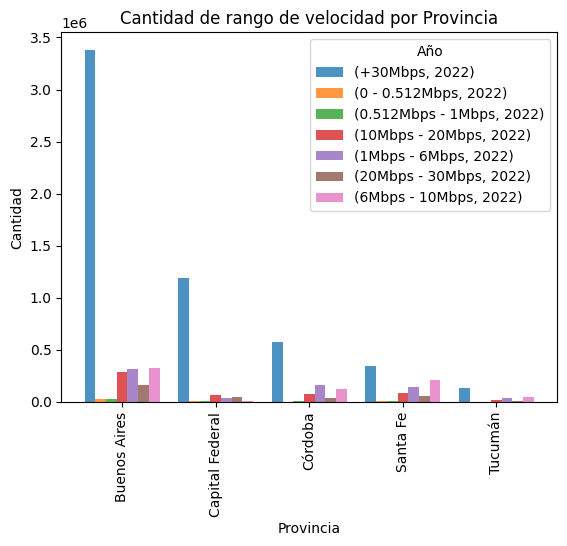

In [124]:
#Filtro de datos para obtener solo el 2022
df_filtrado = prov_vel_range[prov_vel_range['Provincia'].isin(['Buenos Aires','Capital Federal','Córdoba','Santa Fe','Tucumán']) & prov_vel_range['Año'].isin([2022])]

# Crea un pivot table para tener los años como columnas
pivot_table = df_filtrado.pivot_table(index='Provincia', columns='Año', values=['0 - 0.512Mbps','0.512Mbps - 1Mbps','1Mbps - 6Mbps','6Mbps - 10Mbps','10Mbps - 20Mbps','20Mbps - 30Mbps','+30Mbps'], aggfunc='sum')
# Crea el gráfico de barras con las barras superpuestas
pivot_table.plot(kind='bar', width=0.8, alpha=0.8)
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.title('Cantidad de rango de velocidad por Provincia')
plt.legend(title='Año', bbox_to_anchor=(1, 1))
plt.show()

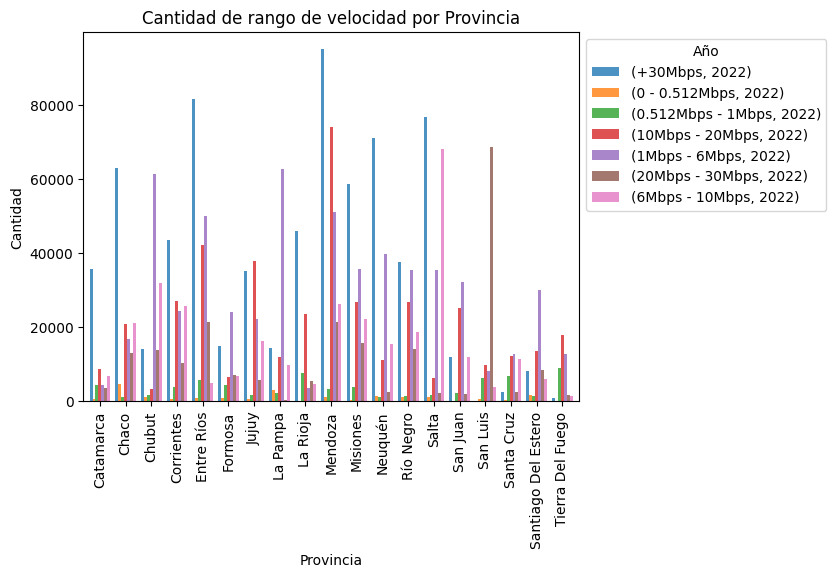

In [125]:
#Filtro de datos para obtener solo el 2022
df_filtrado = prov_vel_range[~prov_vel_range['Provincia'].isin(['Buenos Aires','Capital Federal','Córdoba','Santa Fe','Tucumán']) & prov_vel_range['Año'].isin([2022])]

# Crea un pivot table para tener los años como columnas
pivot_table = df_filtrado.pivot_table(index='Provincia', columns='Año', values=['0 - 0.512Mbps','0.512Mbps - 1Mbps','1Mbps - 6Mbps','6Mbps - 10Mbps','10Mbps - 20Mbps','20Mbps - 30Mbps','+30Mbps'], aggfunc='sum')
# Crea el gráfico de barras con las barras superpuestas
pivot_table.plot(kind='bar', width=0.8, alpha=0.8)
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.title('Cantidad de rango de velocidad por Provincia')
plt.legend(title='Año', bbox_to_anchor=(1, 1))
plt.show()

#### Conclusion de graficos por velocidad de conexion por provincia

`Graficos de barras sugieren el dominio de las altas velocidad de conexion`

Simplemente se puede realizar un observacion concreta, en todas las Provincias se busca ya sea por preferencia o por infraestructura la mayor y mejor velocidad de conexion posible dentro de cada una/ Esto va complementad de nuestra descripcion de este fenomeno:  

- Mas velocidad: el descenso y encuentro de velocidad intermedias podrian indicar una tendencia la compra de mas ancho de banda tanto por necesidad como cantidad de promociones para incrementar la velocidad por parte de las empresas prestadoras. Tambien la creciente demanda de servicios en linea como la transmision de video en alta definicion, juegos online y transferencia de grandes archivos.

Pero de igual manera pero no en la misma cantidad, la segunda velocidad mas contratada o utlizada es baja. Esto corresponde tambien al uso del tipo de conexion ADSL que brinda esta velocidad y su gran cantidad de conexiones aun en vigencia. Esto es reflejado por la conclusion a nivel nacional realizada:

- Brecha digital: asi como vemos una necesidad de velocidades mayores tambien podemos apreciar la persistencia de velocidades mas bajas. Esto puede estar relacionado con factores como la disponibilidad de infraestructura de banda ancha y la ubicación geográfica.


---

### Velocidad media por provincia por periodos de tiempo

`Dataframe: prov_vel_mean`

Este dataframe contiene información sobre la velocidad media de conexion que tienen los ciudadanos de la Republica Argentina, estimado en Mbps durante un periodo de tiempo.

Descripcion:
- Año: periodo de tiempo donde se evaluan los accesos. 
- Trimestre: subdivisiones del periodo año.
- Provincia: provincia a la que pertenecen los datos.
- Mbps (Media de bajada): velocidad media de conexion a internet durante un periodo de tiempo.
- Trimestre.1: trimestre detallado por meses y año especifico.

In [126]:
#Tamaño de dataframe
prov_vel_mean.shape

(792, 4)

In [127]:
#Resumen de primeros datos
prov_vel_mean.head(3)

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,1,Buenos Aires,63
1,2022,1,Capital Federal,88
2,2022,1,Catamarca,51


In [128]:
#Valores nulos y tipos de datos de las series
print(prov_vel_mean.isnull().sum())
print(prov_vel_mean.dtypes)

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64
Año                        int64
Trimestre                  int64
Provincia                 object
Mbps (Media de bajada)     int64
dtype: object


In [129]:
#Eliminar columnas innecesarias
prov_vel_mean = prov_vel_mean.drop(['Trimestre'], axis=1)

In [130]:
#Agrupar datos por año promediando trimestres
prov_vel_mean = prov_vel_mean.groupby(['Año', 'Provincia']).mean().reset_index()

In [131]:
prov_vel_mean.describe()

,Año,Mbps (Media de bajada)
count,216.00,216.00
mean,2018.00,14.22
std,2.59,14.62
min,2014.00,3.00
25%,2016.00,4.44
50%,2018.00,7.62
75%,2020.00,20.50
max,2022.00,88.00


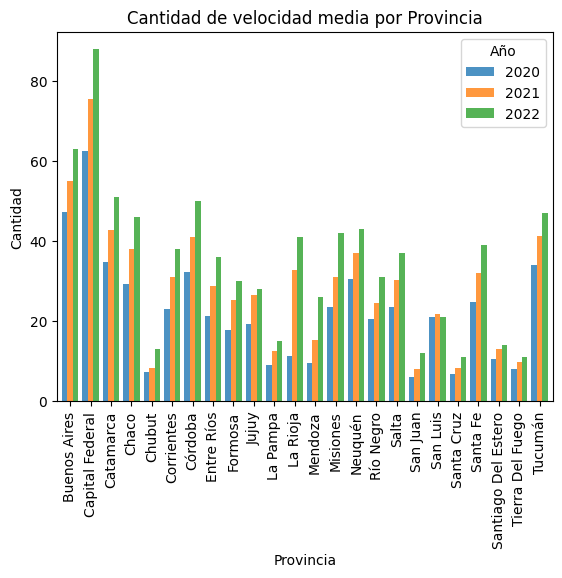

In [132]:
#Filtro de datos para obtener solo el 2020, 2021, 2022
df_filtrado = prov_vel_mean[prov_vel_mean['Año'].isin([2020,2021,2022])]

# Crea un pivot table para tener los años como columnas
pivot_table = df_filtrado.pivot_table(index='Provincia', columns='Año', values='Mbps (Media de bajada)', aggfunc='sum')
# Crea el gráfico de barras con las barras superpuestas
pivot_table.plot(kind='bar', width=0.8, alpha=0.8)
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.title('Cantidad de velocidad media por Provincia')
plt.legend(title='Año', bbox_to_anchor=(1, 1))
plt.show()

#### Conclusion de grafico por velocidad media de conexion por provincia en los ultimos 3 años

`Grafico de barra medianamente variado con valores extremos`

En este grafico podemos observar que la velocidad media mayor se encuentra en las grandes urbes de la Republica Argentina, como ser Capital Federal, Buenos Aires y Cordoba. Aunque extrañamente tambien es un caracteristica de Tucuman que es un Provincia medianamente pequeña, esto derivado de que la gran cantidad de sus conexiones son de alta velocidad (+30Mbps) y del bajo numero de poblacion.

Debemos apreciar aun la busqueda constante de aumento de velocidad para todas las Provincias.<br>


---